In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from IPython.display import display
from PIL import Image, ImageDraw
from shared.drawing import *

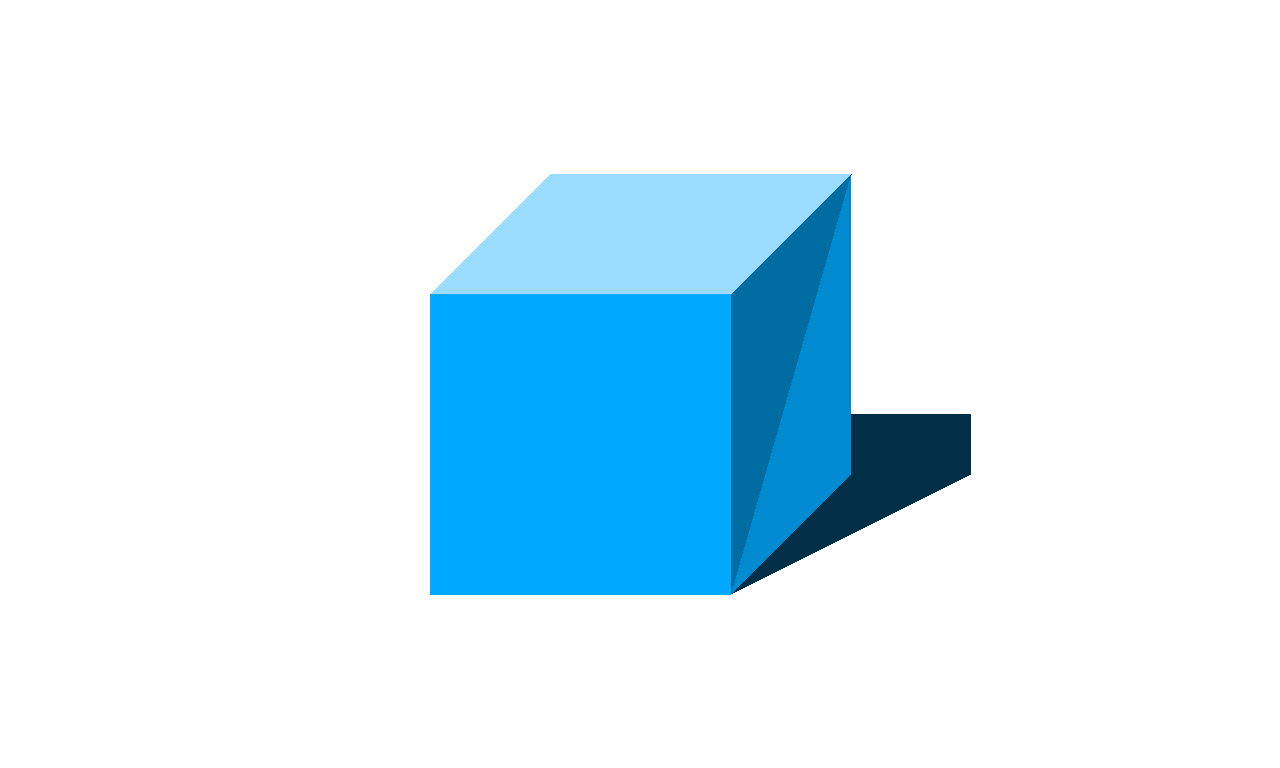

In [2]:
IMG_SIZE = Size(1280, 768)
IMG_CENTER = Point(IMG_SIZE.width / 2, IMG_SIZE.height / 2)
TOP_OFFSET = 120

NUM_COLORS = 5
assert NUM_COLORS == 5, f"NUM_COLORS must be 5"


def mix_colors(adjust_lum: int) -> list[Color]:
    new_colors = []
    for i in range(1, NUM_COLORS):
        new_lum = root.fill.lum + (i * adjust_lum)
        new_color = Color(root.fill.hue, root.fill.sat, new_lum)
        new_colors.append(new_color)
    return new_colors


image = Image.new("RGB", (IMG_SIZE.width, IMG_SIZE.height), color="white")
canvas = ImageDraw.Draw(image)
root = Rectangle(
    Size(150, 90), 
    Color(200, 100, 50), 
    Stroke(Color(0, 0, 0), 2),
    Point(IMG_CENTER.x - TOP_OFFSET/2, IMG_CENTER.y + TOP_OFFSET/2))

tints = mix_colors(10)
shades = mix_colors(-9)
shades.reverse()
palette = [*shades, root.fill, *tints]

face = Rectangle(Size(300, 300), palette[4], Stroke(palette[4], 0), root.center)
fb = face.bounds()

top = Bounds(
    Point(fb.top_left.x + TOP_OFFSET, fb.top_left.y - TOP_OFFSET),
    Point(fb.top_right.x + TOP_OFFSET, fb.top_right.y - TOP_OFFSET),
    Point(fb.top_right.x, fb.top_right.y),
    Point(fb.top_left.x, fb.top_left.y))

side1 = [(fb.top_right.x, fb.top_right.y), 
            (top.top_right.x, top.top_right.y),
            (fb.bottom_right.x, fb.bottom_right.y)]

side2 = [(fb.bottom_right.x, fb.bottom_right.y),
            (top.top_right.x, top.top_right.y),
            (fb.bottom_right.x + TOP_OFFSET, fb.bottom_right.y - TOP_OFFSET)]

shadow = [(fb.bottom_right.x, fb.bottom_right.y),
            (fb.bottom_right.x + TOP_OFFSET*2, fb.bottom_right.y - TOP_OFFSET), 
            (fb.bottom_right.x + TOP_OFFSET*2, fb.bottom_right.y - TOP_OFFSET*1.5), 
            (fb.bottom_right.x, fb.bottom_right.y - TOP_OFFSET*1.5)]

canvas.polygon(shadow, fill=palette[0].as_rgb())
canvas.polygon(side2, fill=palette[3].as_rgb())
canvas.polygon(side1, fill=palette[2].as_rgb())
canvas.polygon(top.values(), fill=palette[7].as_rgb())
canvas.rectangle(face.diagonal_corners(), fill=palette[4].as_rgb())

display(image)